<a href="https://colab.research.google.com/github/Ganushkevych/Gold_BTC_Correlation/blob/main/Gold_BTC_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [25]:
start_date = "2016-01-01"
btc = yf.download("BTC-USD", start=start_date, interval='1d')
gold = yf.download("GC=F", start=start_date, interval='1d')

/tmp/ipython-input-2471531062.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc = yf.download("BTC-USD", start=start_date, interval='1d')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2471531062.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gold = yf.download("GC=F", start=start_date, interval='1d')
[*********************100%***********************]  1 of 1 completed


In [ ]:
 btc.info()
 print(btc.head(), btc[-6:], btc.describe(), sep='\n\n')

In [ ]:
gold.info()
print(gold.head(), gold[-6:], gold.describe(), sep='\n\n')

Ticker,GC=F,BTC-USD
Ticker,,
GC=F,1.000000,0.926767
BTC-USD,0.926767,1.000000


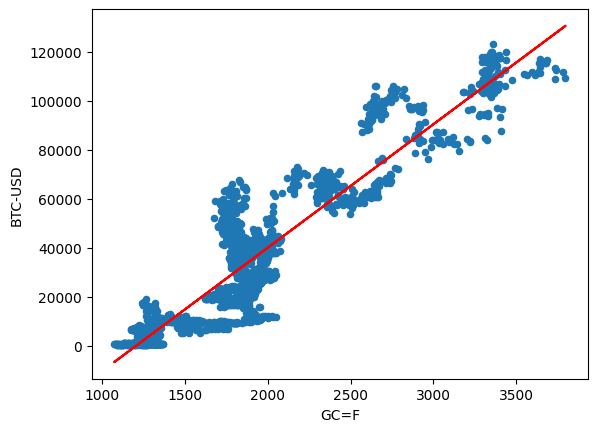

In [26]:
gold_close_price = gold['Close']
btc_close_prise = btc['Close']

data = pd.concat([gold_close_price, btc_close_prise], axis=1).dropna()
data.plot(kind='scatter', x='GC=F', y='BTC-USD')
line_of_best_fit = np.poly1d(np.polyfit(x=data['GC=F'], y=data['BTC-USD'], deg=1))
plt.plot(data['GC=F'], line_of_best_fit(data['GC=F']), 'r')
data.corr()

<Axes: title={'center': 'Year rolling correlation between BTC and Gold'}, xlabel='Date'>

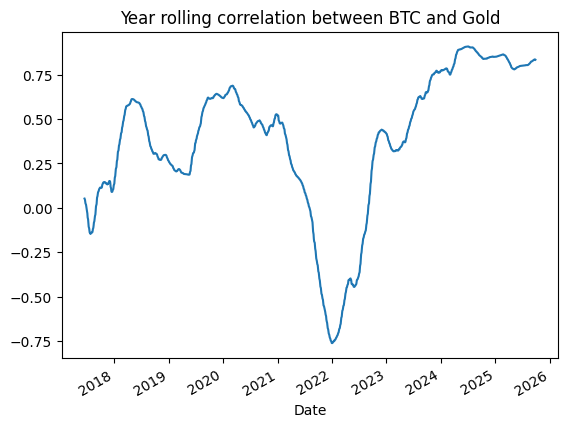

In [28]:
rolling_corr = data['BTC-USD'].rolling(365).corr(data['GC=F'])
rolling_corr.plot(title='Year rolling correlation between BTC and Gold')